In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [64]:
data = pd.read_csv('train.csv')

In [65]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:] / 0xFF

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:] / 0xFF

In [75]:
def init_params(arch = [784, 16, 10]):
    W = []
    B = []
    for i, l in enumerate(arch[:-1]):
        W.append(np.random.rand(arch[i + 1], l) - 0.5)
        B.append(np.random.rand(arch[i + 1], 1) - 0.5)

    return W, B

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z), axis=0)

def forward_prop(W, B, X):
    Z = []
    A = []
    A_prev = X
    for w, b in zip(W, B):
        Z.append(z := w.dot(A_prev) + b)
        A.append(A_prev := ReLU(z))
    A[-1] = softmax(Z[-1])  # Change last ReLU to softmax
    return Z, A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, np.max(Y) + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T

def deriv_ReLU(Z):
    return Z > 0

def back_prop(Z, A, W, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    
    dW = []
    dB = []
    dz = A[-1] - one_hot_Y  # Partial derivative of quadratic cost
    for z, a, w in zip(Z[-2::-1], A[-2::-1], W[:0:-1]):
        dW.append(1 / m * dz.dot(a.T))
        dB.append(1 / m * np.sum(dz))
        dz = w.T.dot(dz) * deriv_ReLU(z)
    
    dW.append(1 / m * dz.dot(X.T))
    dB.append(1 / m * np.sum(dz))

    return dW[::-1], dB[::-1]

def update_params(W, B, dW, dB, alpha):
    W_new = []
    B_new = []
    for w, b, dw, db in zip(W, B, dW, dB):
        W_new.append(w - alpha * dw)
        B_new.append(b - alpha * db)
    return W_new, B_new

In [80]:
def get_predictions(A):
    return np.argmax(A, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha, arch):
    acc = []
    W, B = init_params(arch) if arch else init_params()
    for i in range(iterations):
        Z, A = forward_prop(W, B, X)
        dW, dB = back_prop(Z, A, W, X, Y)
        W, B = update_params(W, B, dW, dB, alpha)

        if i % 50 == 0:
            acc.append(get_accuracy(get_predictions(A[-1]), Y))
            print("Iteration: ", i)
            print("Accuracy: ", acc[-1])
    return W, B, acc

In [85]:
W, B, acc = gradient_descent(X_train, Y_train, 500, 0.1, [784, 256, 10])

Iteration:  0
Accuracy:  0.0624390243902439
Iteration:  50
Accuracy:  0.7575853658536585
Iteration:  100
Accuracy:  0.8196585365853658
Iteration:  150
Accuracy:  0.8468780487804878
Iteration:  200
Accuracy:  0.8645853658536585
Iteration:  250
Accuracy:  0.8773414634146341
Iteration:  300
Accuracy:  0.8863414634146342
Iteration:  350
Accuracy:  0.8937073170731707
Iteration:  400
Accuracy:  0.9001463414634147
Iteration:  450
Accuracy:  0.9050975609756098


In [89]:
# Test Accuracy

Z_test, A_test = forward_prop(W, B, X_dev)
get_accuracy(get_predictions(A_test[-1]), Y_dev)

0.903

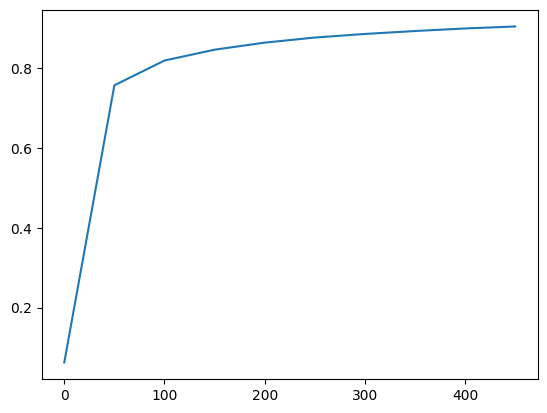

In [86]:
plt.plot(50 * np.arange(len(acc)), acc)